In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel("Data AI4CKD.xlsx")
data.head()

,ID,Sexe,Age,Nationalité,Profession (selon catégorie professionnelle),Adresse (Département),Situation Matrimoniale,Motif(s) d'Admission/Asthénie,Motif(s) d'Admission/Altération de la fonction rénale,Motif(s) d'Admission/HTA,...,Pathologies/Rétinopathie diabétique,Pathologies/Artériosclérose,Pathologies/Glaucome,Autres Pathologies,Rythme Cardiaque/Sinusal,Rythme Cardiaque/Régulier,Trouble de la Repolarisation,Stage de l'IRC,Causes Majeure après Diagnostic/HTA,Causes Majeure après Diagnostic/Diabète
0,1,F,50.0,Béninoise,Artisan,Littoral,Marié(e),1.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,CKD 5,0.0,0.0
1,2,M,28.0,Béninoise,Artisan,Zou,Marié(e),1.0,1.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,CKD 5,0.0,0.0
2,3,F,69.0,Béninoise,NaN,Atlantique,Marié(e),1.0,1.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,CKD 5,0.0,0.0
3,4,M,68.0,Béninoise,Entrepreneur,Plateau,Marié(e),1.0,0.0,1.0,...,0.0,NaN,0.0,Flou visuel,0.0,NaN,Oui,CKD 5,0.0,0.0
4,5,F,68.0,Béninoise,NaN,NaN,Marié(e),1.0,1.0,0.0,...,0.0,NaN,1.0,NaN,0.0,Non,Non,CKD 5,1.0,0.0


In [3]:
df = data.copy()

In [4]:
print(list(df.columns))

['ID', 'Sexe', 'Age', 'Nationalité', 'Profession (selon catégorie professionnelle)', 'Adresse (Département)', 'Situation Matrimoniale', "Motif(s) d'Admission/Asthénie", "Motif(s) d'Admission/Altération de la fonction rénale", "Motif(s) d'Admission/HTA", "Motif(s) d'Admission/Œdème", "Motif(s) d'Admission/Diabète", "Motif(s) d'Admission/Douleur abdominale", "Autres Motifs d'Admission", 'Personnels Médicaux/HTA', 'Personnels Médicaux/Diabète 1', 'Personnels Médicaux/Diabète 2', 'Personnels Médicaux/IRC', 'Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)', 'Personnels Médicaux/Ulcère', 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)', 'Autres Antécédents Personnels Médicaux', 'Durée HTA (mois)', 'Durée Diabète 1 (mois)', 'Durée Diabète 2 (mois)', 'Durée IRC (mois)', 'Personnels Chirurgicaux/Appendicectomie', 'Personnels Chirurgicaux/Césarienne', 'Personnels Chirurgicaux/Hystérectomie', 'Autre Antécédent Personnel Chirurgical', 'Personnels Familiaux/HTA

In [5]:
df.drop(['ID', 'Sexe', 'Nationalité', 'Profession (selon catégorie professionnelle)', "Autres Motifs d'Admission", 'IMC', 'Diurèse', 'Adresse (Département)', 'Glycémie à jeun (taux de Glucose)', 'Situation Matrimoniale', 'Personnels Chirurgicaux/Appendicectomie', 'Personnels Chirurgicaux/Césarienne', 'Personnels Chirurgicaux/Hystérectomie', 'Autre Antécédent Personnel Chirurgical', 'Personnels Médicaux/Ulcère', 'Autres Antécédents Personnels Médicaux', 'Durée HTA (mois)', 'Durée Diabète 1 (mois)', 'Durée Diabète 2 (mois)', 'Durée IRC (mois)', 'Autres Antécédents Personnels Familiaux', 'Personnels Familiaux/Diabète', 'Personnels Familiaux/HTA', 'Enquête Sociale/Tabac', 'Enquête Sociale/AlNS (+)', 'Enquête Sociale/Alcool', 'Enquête Sociale/Phytothérapie traditionnelle', 'Enquête Sociale/Epice', 'Enquête Sociale/PEC oui', 'Enquête Sociale/PEC non', "Autres détails de l'Enquête Sociale à Préciser", 'Début des symptômes (mois)', 'Symptômes/Fièvre', 'Symptômes/Fièvre', 'Symptômes/Frissons', 'Symptômes/Céphalées', 'Symptômes/Douleur Lombaire', 'Symptômes/Dysurie', 'Symptômes/Oligurie', 'Symptômes/Diarrhée', 'Symptômes/Douleur Thoracique', 'Symptômes/Anorexie', 'Symptômes/Douleur abdominale', 'Symptômes/Articulaire', 'Symptômes/Nycturie', 'Symptômes/Toux Grave', 'Symptômes/Détresse Respiratoire', 'Symptômes/Bouffissure du Visage', 'Autre Symptôme à Notifier', 'Automédication ?', 'Etat Général (EG)/Plis de déshydratation', 'Etat Général (EG)/Autre', 'Sueur', 'Température (C°)', 'TA (mmHg)/Systole', 'TA (mmHg)/Diastole', 'Poul (bpm)', 'Poids (Kg)', 'Taille (m)', 'SaO^2 (%)', 'FR (cpm)', 'BU/Leucocytose', 'BU/Nitrite', 'BU/Hématurie', 'BU/Protéinurie', 'BU/Glucosurie', 'BU/Albuminuerie', 'Coloration des Urines', 'Aspect des Urines', 'Vibrations Vocales (VV)', 'Amplification Thoracique', 'Sonorité Pulmonaire', 'Murmure Vésiculaire', 'Râles crépitants', "Autres Détails de l'Examen Pleuropulmonaire", 'B1 et B2/Réguliers', 'B1 et B2/Perçu sans souffle', 'Choc de Pointe/Perçu', 'Choc de Pointe/Palpé', 'Lieu de la Palpation/ EICG (Espace InterCostal Gauche)  ', 'Pouls Périphériques/Régulier', 'Présence de bruits surajoutés', 'TSJ (Signe de Hazer)', 'RHJ', 'Mollets souples', 'OMI/Bilatéral', 'OMI/Indolores', 'OMI/Mous', 'OMI/Douloureux', 'OMI/Prenant le godet', "OMI/Remontant jusqu'au", 'Hygiène buccodentaire', 'Langue', 'Abdomen/Souple', 'Abdomen/Balloné (et infiltré)', 'Abdomen/Douloureux', 'Douleur Epigastrique', 'Douleur Hypogastrique', "Douleur à l'hypochondre", 'Abdomen/Participe bien à la respiration', 'Matité des flancs', 'Hépatomégalie (augmentation du foi)', 'Points Urétéraux douloureux', 'Contact Lombaire', 'Fosse Lombaire/Symétrique', 'Fosse Lombaire/Douloureux', 'Présence de Masse Lombaire', 'Signe de Giordano', 'Miction (Incontinence Urinaire)/Vue', 'Miction (Incontinence Urinaire)/Confortable', 'Miction (Incontinence Urinaire)/Normale', 'Brûlures mictionnelles', 'Globe vésical', 'Douleur pelvienne', 'Vessie de Lutte', 'Ballotement Rénal', 'Conscience', 'Score de Glasgow (/15)', 'Motricité', 'Sensibilité', 'Convulsions', 'Protéinurie', 'Protéinurie à la bandellette urinaire (g/24h)', 'Na^+ (meq/L)', 'K^+ (meq/L)', 'Ca^2+ (meq/L)', 'Cl^- (meq/L)', 'P (meq/L)', 'Hb (g/dL)', 'Hte (%)', 'Hématie (T/L)', 'VGM (fL)', 'TCMH (pg)', 'CCMH (%)', 'NB (G/L)', 'PN (G/L)', 'PE (G/L)', 'PB (G/L)', 'Mo (G/L)', 'Ly (G/L)', 'Ret (g/L)', 'Plaquettes (g/L)', 'Cholestérol Total', 'Cholestérol HDL', 'Cholestérol LDL', 'Triglycérides', 'Tests Populaires/VIH', 'Tests Populaires/Ag HBs', 'Tests Populaires/Ac HVC', 'Tests Populaires/PU (g/24h)', 'Grosseur Rein Gauche ', 'Grosseur Rein Droit ', 'Calcul Rénal', 'Kyste', 'Différenciation des reins', 'Echogénicité', 'Contour régulier/Rein droit', 'Contour régulier/Rein gauche', 'Pathologies/Rétinopathie hypertensive', 'Pathologies/Rétinopathie diabétique', 'Pathologies/Artériosclérose', 'Pathologies/Glaucome', 'Autres Pathologies', 'Rythme Cardiaque/Sinusal', 'Rythme Cardiaque/Régulier', 'Trouble de la Repolarisation', 'Causes Majeure après Diagnostic/HTA', 'Causes Majeure après Diagnostic/Diabète'], axis=1, inplace=True)
df.head()

,Age,Motif(s) d'Admission/Asthénie,Motif(s) d'Admission/Altération de la fonction rénale,Motif(s) d'Admission/HTA,Motif(s) d'Admission/Œdème,Motif(s) d'Admission/Diabète,Motif(s) d'Admission/Douleur abdominale,Personnels Médicaux/HTA,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,...,Evolution de l'Etat Générale/Patient Perdu de vue,Etat Général (EG) à l'Admission,Etat Général (EG)/OMI,Etat Général (EG)/Muqueuse Bulbaire,Etat Général (EG)/Muqueuse Palpébrale,OMI/Siégeant au niveau des pieds,Urée (g/L),Créatinine (mg/L),Anémie,Stage de l'IRC
0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,Altéré,0.0,Anictérique,Pâle,Non,1.29,169.0,Oui,CKD 5
1,28.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,Altéré,1.0,Anictérique,Pâle,Non,0.66,17.0,Oui,CKD 5
2,69.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,Altéré,1.0,Anictérique,Moyennement colorée,Non,0.79,48.0,Oui,CKD 5
3,68.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Altéré,1.0,Anictérique,Moyennement colorée,Oui,1.14,42.0,Oui,CKD 5
4,68.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,Aceptable,1.0,Anictérique,Moyennement colorée,Oui,NaN,500.0,Oui,CKD 5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 34 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Age                                                                             300 non-null    float64
 1   Motif(s) d'Admission/Asthénie                                                   307 non-null    float64
 2   Motif(s) d'Admission/Altération de la fonction rénale                           307 non-null    float64
 3   Motif(s) d'Admission/HTA                                                        307 non-null    float64
 4   Motif(s) d'Admission/Œdème                                                      307 non-null    float64
 5   Motif(s) d'Admission/Diabète                                                    307 non-null    float64
 6   Motif(s) d'Admissi

In [7]:
df.dropna(inplace=True)
df.head()

,Age,Motif(s) d'Admission/Asthénie,Motif(s) d'Admission/Altération de la fonction rénale,Motif(s) d'Admission/HTA,Motif(s) d'Admission/Œdème,Motif(s) d'Admission/Diabète,Motif(s) d'Admission/Douleur abdominale,Personnels Médicaux/HTA,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,...,Evolution de l'Etat Générale/Patient Perdu de vue,Etat Général (EG) à l'Admission,Etat Général (EG)/OMI,Etat Général (EG)/Muqueuse Bulbaire,Etat Général (EG)/Muqueuse Palpébrale,OMI/Siégeant au niveau des pieds,Urée (g/L),Créatinine (mg/L),Anémie,Stage de l'IRC
0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,Altéré,0.0,Anictérique,Pâle,Non,1.29,169.0,Oui,CKD 5
1,28.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,Altéré,1.0,Anictérique,Pâle,Non,0.66,17.0,Oui,CKD 5
2,69.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,Altéré,1.0,Anictérique,Moyennement colorée,Non,0.79,48.0,Oui,CKD 5
3,68.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Altéré,1.0,Anictérique,Moyennement colorée,Oui,1.14,42.0,Oui,CKD 5
5,58.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,Aceptable,1.0,Ictérique,Bien colorée,Non,1.58,156.0,Oui,CKD 5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 308
Data columns (total 34 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Age                                                                             210 non-null    float64
 1   Motif(s) d'Admission/Asthénie                                                   210 non-null    float64
 2   Motif(s) d'Admission/Altération de la fonction rénale                           210 non-null    float64
 3   Motif(s) d'Admission/HTA                                                        210 non-null    float64
 4   Motif(s) d'Admission/Œdème                                                      210 non-null    float64
 5   Motif(s) d'Admission/Diabète                                                    210 non-null    float64
 6   Motif(s) d'Admission/Do

In [ ]:
dic1 = {
    "Oui":1,
    "Non":0
}

dic2 = {
    "Bon":1,
    "Aceptable":2,
    "Altéré":3
}

dic3 = {
    "Anictérique":0,
    "Ictérique":1
}

dic4 = {
    "Bien colorée":1,
    "Moyennement colorée":2,
    "Pâle":3
}

dic5 = {
    "CKD 1":1,
    "CKD 2":2,
    "CKD 3a":3,
    "CKD 3b":4,
    "CKD 4":5,
    "CKD 5":6
}

df["Symptômes/OMI"] = df["Symptômes/OMI"].map(dic1)
df["OMI/Siégeant au niveau des pieds"] = df["OMI/Siégeant au niveau des pieds"].map(dic1)
df["Anémie"] = df["Anémie"].map(dic1)
df["Etat Général (EG) à l'Admission"] = df["Etat Général (EG) à l'Admission"].map(dic2)
df["Etat Général (EG)/Muqueuse Bulbaire"] = df["Etat Général (EG)/Muqueuse Bulbaire"].map(dic3)
df["Etat Général (EG)/Muqueuse Palpébrale"] = df["Etat Général (EG)/Muqueuse Palpébrale"].map(dic4)
df["Stage de l'IRC"] = df["Stage de l'IRC"].map(dic5)
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 304
Data columns (total 34 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Age                                                                             209 non-null    float64
 1   Motif(s) d'Admission/Asthénie                                                   209 non-null    float64
 2   Motif(s) d'Admission/Altération de la fonction rénale                           209 non-null    float64
 3   Motif(s) d'Admission/HTA                                                        209 non-null    float64
 4   Motif(s) d'Admission/Œdème                                                      209 non-null    float64
 5   Motif(s) d'Admission/Diabète                                                    209 non-null    float64
 6   Motif(s) d'Admission/Do

In [11]:
def trans_int(df, x):
    for i in x:
        df[i] = df[i].astype(int)
    return df

In [12]:
print(list(df.columns))

['Age', "Motif(s) d'Admission/Asthénie", "Motif(s) d'Admission/Altération de la fonction rénale", "Motif(s) d'Admission/HTA", "Motif(s) d'Admission/Œdème", "Motif(s) d'Admission/Diabète", "Motif(s) d'Admission/Douleur abdominale", 'Personnels Médicaux/HTA', 'Personnels Médicaux/Diabète 1', 'Personnels Médicaux/Diabète 2', 'Personnels Médicaux/IRC', 'Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)', 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)', 'Symptômes/Anémie', 'Symptômes/Nausées', 'Symptômes/HTA', 'Symptômes/Flou visuel', 'Symptômes/Asthénie', 'Symptômes/Vomissements', 'Symptômes/Insomnie', 'Symptômes/Perte de poids', 'Symptômes/OMI', "Evolution de l'Etat Générale/Favorable", "Evolution de l'Etat Générale/Pas Favorable", "Evolution de l'Etat Générale/Patient Perdu de vue", "Etat Général (EG) à l'Admission", 'Etat Général (EG)/OMI', 'Etat Général (EG)/Muqueuse Bulbaire', 'Etat Général (EG)/Muqueuse Palpébrale', 'OMI/Siégeant au niveau des pie

In [13]:
x = ['Age', "Motif(s) d'Admission/Asthénie", "Motif(s) d'Admission/Altération de la fonction rénale", "Motif(s) d'Admission/HTA", "Motif(s) d'Admission/Œdème", "Motif(s) d'Admission/Diabète", "Motif(s) d'Admission/Douleur abdominale", 'Personnels Médicaux/HTA', 'Personnels Médicaux/Diabète 1', 'Personnels Médicaux/Diabète 2', 'Personnels Médicaux/IRC', 'Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)', 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)', 'Symptômes/Anémie', 'Symptômes/Nausées', 'Symptômes/HTA', 'Symptômes/Flou visuel', 'Symptômes/Asthénie', 'Symptômes/Vomissements', 'Symptômes/Insomnie', 'Symptômes/Perte de poids', 'Symptômes/OMI', "Evolution de l'Etat Générale/Favorable", "Evolution de l'Etat Générale/Pas Favorable", "Evolution de l'Etat Générale/Patient Perdu de vue", "Etat Général (EG) à l'Admission", 'Etat Général (EG)/OMI', 'Etat Général (EG)/Muqueuse Bulbaire', 'Etat Général (EG)/Muqueuse Palpébrale', 'OMI/Siégeant au niveau des pieds', 'Anémie', "Stage de l'IRC"]
trans_int(df, x)

,Age,Motif(s) d'Admission/Asthénie,Motif(s) d'Admission/Altération de la fonction rénale,Motif(s) d'Admission/HTA,Motif(s) d'Admission/Œdème,Motif(s) d'Admission/Diabète,Motif(s) d'Admission/Douleur abdominale,Personnels Médicaux/HTA,Personnels Médicaux/Diabète 1,Personnels Médicaux/Diabète 2,...,Evolution de l'Etat Générale/Patient Perdu de vue,Etat Général (EG) à l'Admission,Etat Général (EG)/OMI,Etat Général (EG)/Muqueuse Bulbaire,Etat Général (EG)/Muqueuse Palpébrale,OMI/Siégeant au niveau des pieds,Urée (g/L),Créatinine (mg/L),Anémie,Stage de l'IRC
0,50,1,0,0,0,0,0,1,0,0,...,1,3,0,0,3,0,1.29,169.0,1,6
1,28,1,1,0,0,0,0,0,0,0,...,1,3,1,0,3,0,0.66,17.0,1,6
2,69,1,1,0,0,0,0,1,0,1,...,1,3,1,0,2,0,0.79,48.0,1,6
3,68,1,0,1,1,0,0,0,0,0,...,0,3,1,0,2,1,1.14,42.0,1,6
5,58,0,1,0,0,0,0,1,0,1,...,1,2,1,1,1,0,1.58,156.0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,49,0,1,0,0,0,0,0,0,1,...,1,2,0,0,1,0,0.50,17.4,0,4
299,47,0,1,0,0,0,0,1,0,1,...,1,1,0,0,2,0,0.36,10.0,0,1
301,64,0,1,0,0,0,0,1,0,0,...,1,1,1,0,1,0,0.41,13.0,0,3
302,34,0,1,0,0,0,0,1,0,0,...,1,1,0,0,2,0,0.25,15.0,1,3


In [14]:
df["Urée (g/L)"] = df["Urée (g/L)"] * 1000

In [15]:
df["Créatinine (mg/L)"]

0      169.0
1       17.0
2       48.0
3       42.0
5      156.0
       ...  
297     17.4
299     10.0
301     13.0
302     15.0
304     12.0
Name: Créatinine (mg/L), Length: 209, dtype: float64

In [16]:
correlation = df.corr()


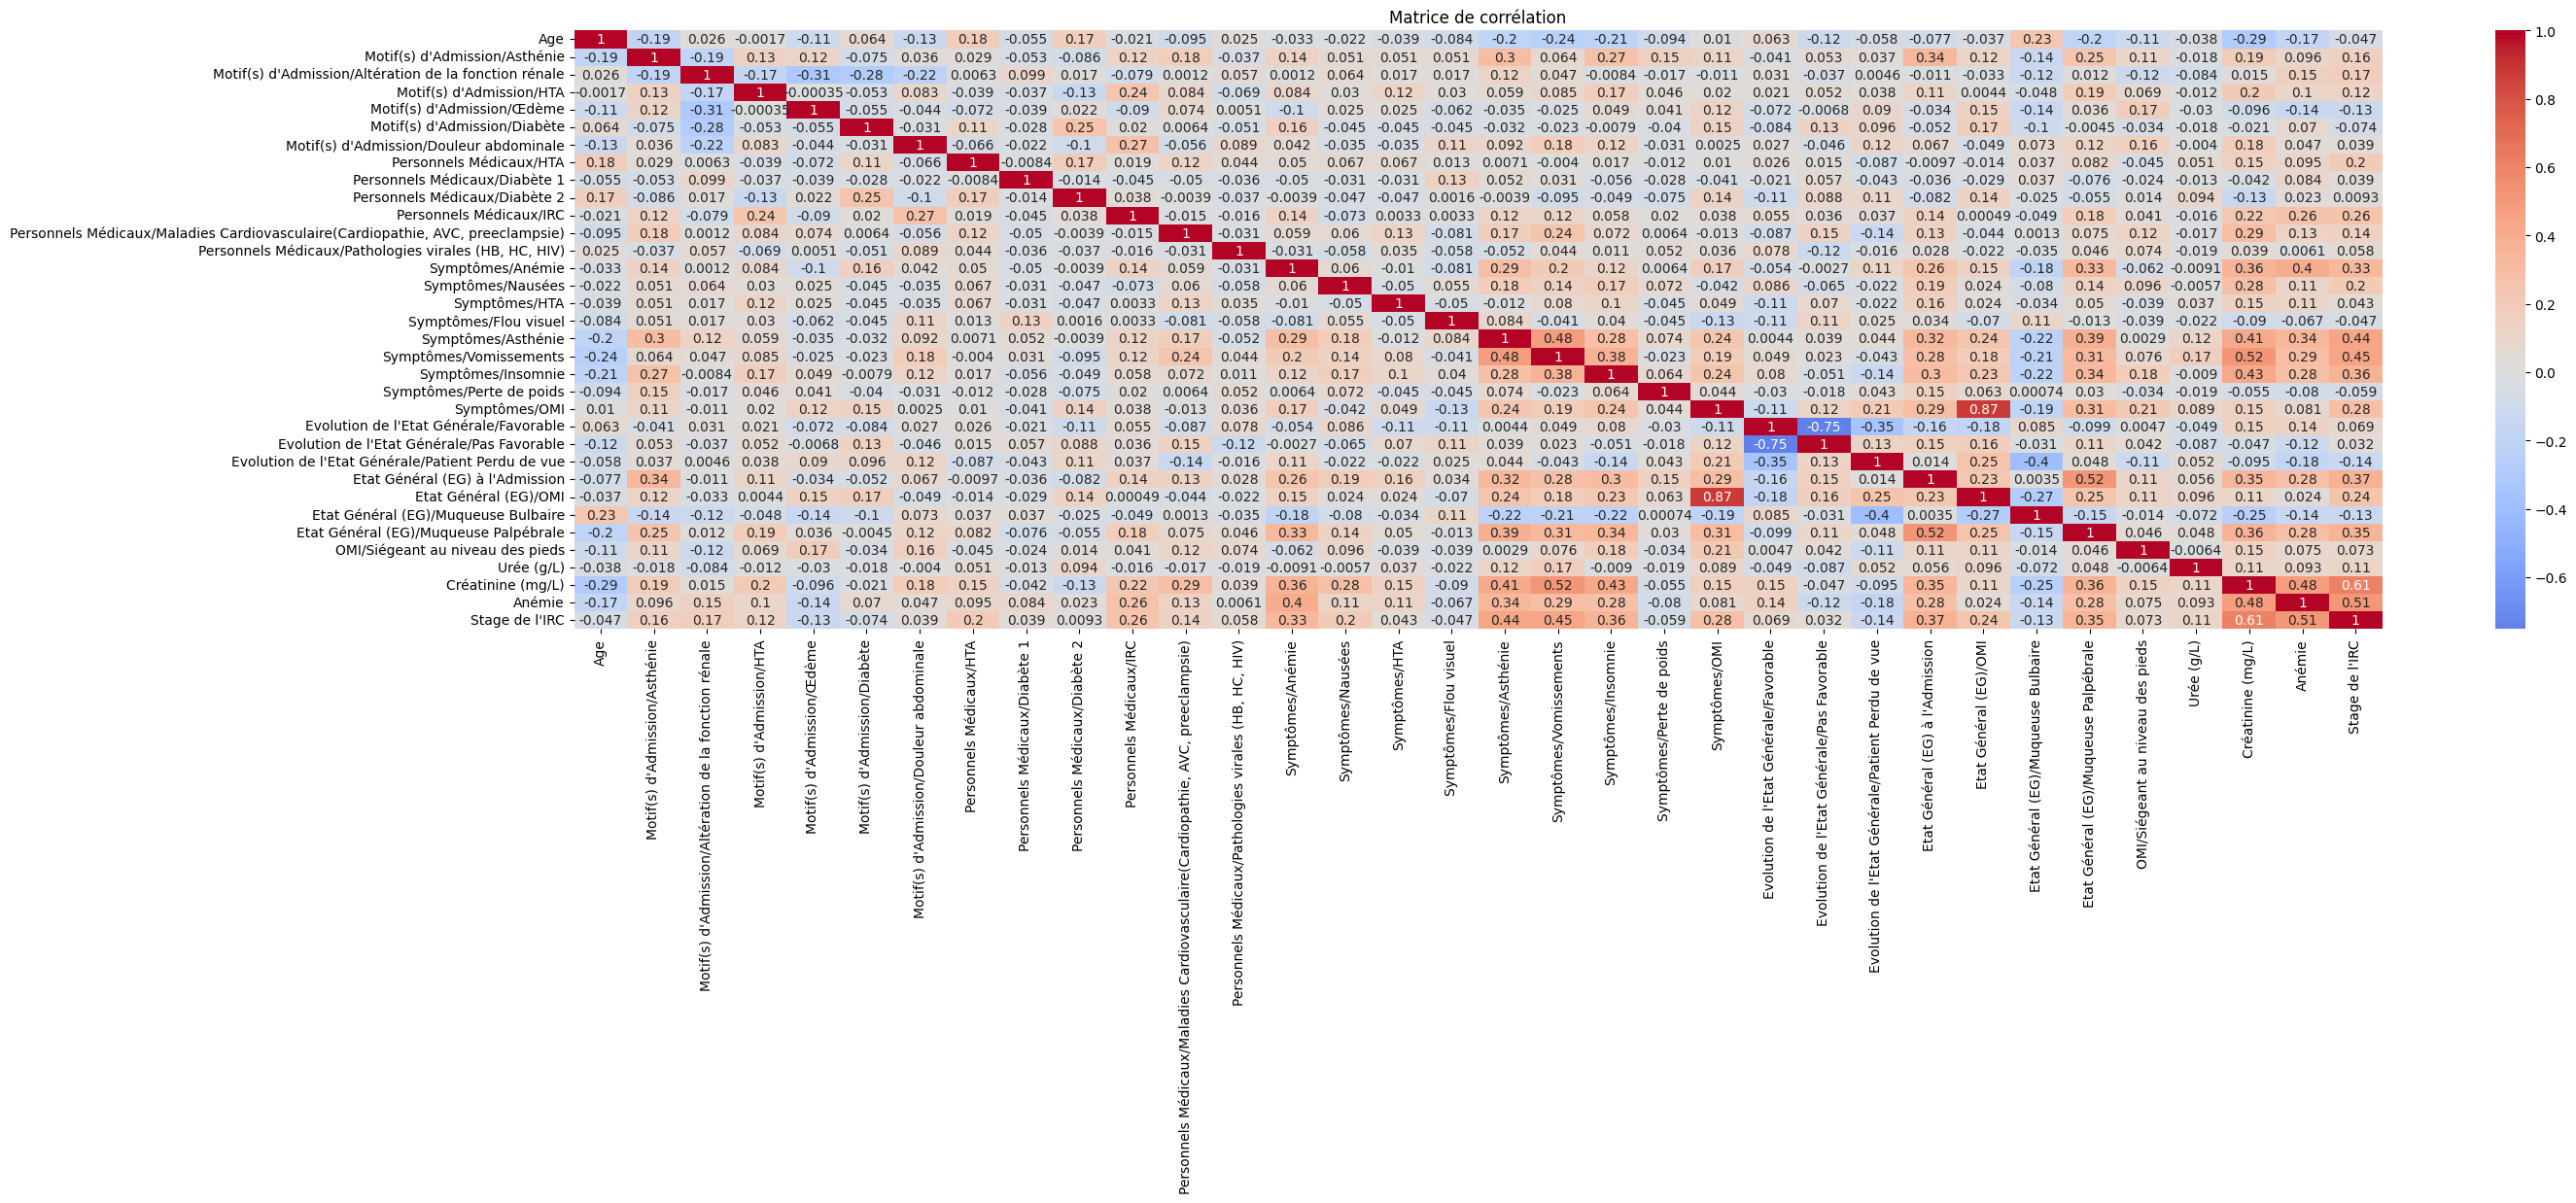

In [17]:
plt.figure(figsize=(30, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()

In [18]:
df.drop(columns=["Evolution de l'Etat Générale/Pas Favorable", "Etat Général (EG)/OMI"], inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 304
Data columns (total 32 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Age                                                                             209 non-null    int64  
 1   Motif(s) d'Admission/Asthénie                                                   209 non-null    int64  
 2   Motif(s) d'Admission/Altération de la fonction rénale                           209 non-null    int64  
 3   Motif(s) d'Admission/HTA                                                        209 non-null    int64  
 4   Motif(s) d'Admission/Œdème                                                      209 non-null    int64  
 5   Motif(s) d'Admission/Diabète                                                    209 non-null    int64  
 6   Motif(s) d'Admission/Do

# Ajout de nouvelles variables à éliminer

In [20]:
df.drop(columns=["Motif(s) d'Admission/Douleur abdominale", "Evolution de l'Etat Générale/Patient Perdu de vue", "OMI/Siégeant au niveau des pieds", "Evolution de l'Etat Générale/Favorable", "Evolution de l'Etat Générale/Patient Perdu de vue", "Etat Général (EG)/Muqueuse Bulbaire", "Etat Général (EG)/Muqueuse Palpébrale", "Personnels Médicaux/IRC", "Age"], inplace=True)


In [21]:
list(df.columns)

["Motif(s) d'Admission/Asthénie",
 "Motif(s) d'Admission/Altération de la fonction rénale",
 "Motif(s) d'Admission/HTA",
 "Motif(s) d'Admission/Œdème",
 "Motif(s) d'Admission/Diabète",
 'Personnels Médicaux/HTA',
 'Personnels Médicaux/Diabète 1',
 'Personnels Médicaux/Diabète 2',
 'Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)',
 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)',
 'Symptômes/Anémie',
 'Symptômes/Nausées',
 'Symptômes/HTA',
 'Symptômes/Flou visuel',
 'Symptômes/Asthénie',
 'Symptômes/Vomissements',
 'Symptômes/Insomnie',
 'Symptômes/Perte de poids',
 'Symptômes/OMI',
 "Etat Général (EG) à l'Admission",
 'Urée (g/L)',
 'Créatinine (mg/L)',
 'Anémie',
 "Stage de l'IRC"]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 304
Data columns (total 24 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Motif(s) d'Admission/Asthénie                                                   209 non-null    int64  
 1   Motif(s) d'Admission/Altération de la fonction rénale                           209 non-null    int64  
 2   Motif(s) d'Admission/HTA                                                        209 non-null    int64  
 3   Motif(s) d'Admission/Œdème                                                      209 non-null    int64  
 4   Motif(s) d'Admission/Diabète                                                    209 non-null    int64  
 5   Personnels Médicaux/HTA                                                         209 non-null    int64  
 6   Personnels Médicaux/Dia

In [22]:
X = df.drop(columns=["Stage de l'IRC"]).values
y = df["Stage de l'IRC"].values


In [23]:
# Standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
def machine_learning(classifieur):
    # Métriques pour l'évaluation de la performance des modèles
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    
    # entraînement du modèle
    classifieur.fit(X_train, y_train)
    
    # prédiction des features de l'échantillon test
    y_pred = classifieur.predict(X_test)
    
    # Affichage matrice de confusion
    print('Matrice de confusion \n')
    print(confusion_matrix(y_test, y_pred))
    
    # Score de précision
    print('\nScore de précision \n')
    sp = round(accuracy_score(y_pred,y_test)*100,2)
    print(f"Précision : {sp}%")

In [26]:
classifier1 = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=200)
machine_learning(classifier1)

Matrice de confusion 

[[4 2 0 0 0 0]
 [2 4 1 0 0 0]
 [0 2 2 2 0 0]
 [0 0 2 4 0 0]
 [0 0 0 0 8 0]
 [0 0 0 0 1 8]]

Score de précision 

Précision : 71.43%


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Définir la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(
    estimator=classifier1,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # utiliser tous les cœurs disponibles
)

# Lancer la recherche
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)

# Utiliser le meilleur modèle
best_model = grid_search.best_estimator_

Meilleurs paramètres: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Meilleur score: 0.6882352941176471


In [28]:
classifier2 = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2)
machine_learning(classifier2)

Matrice de confusion 

[[6 0 0 0 0 0]
 [4 2 1 0 0 0]
 [0 3 1 2 0 0]
 [0 0 2 4 0 0]
 [0 0 0 1 7 0]
 [0 0 0 0 2 7]]

Score de précision 

Précision : 64.29%


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



# Définir la grille d'hyperparamètres
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurer la Grid Search
grid_search = GridSearchCV(
    estimator=classifier2,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy',  # ou 'f1', 'recall' selon votre besoin
    n_jobs=-1,          # utiliser tous les cœurs disponibles
    verbose=1           # afficher la progression
)

# Exécuter la recherche
grid_search.fit(X_train, y_train)

# Résultats
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score (validation):", grid_search.best_score_)

# Évaluer sur le test set
best_dt = grid_search.best_estimator_
test_score = best_dt.score(X_test, y_test)
print("Score sur le test set:", test_score)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits
Meilleurs paramètres: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Meilleur score (validation): 0.7306595365418896
Score sur le test set: 0.6428571428571429
